<a href="https://colab.research.google.com/github/Cherry63/Guvi-assgiment/blob/main/Copy_of_SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

**Importing the dataset**

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Cherry63/Training-datasets/main/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":2})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [6]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,1.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,1.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,1.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,2.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,2.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,2.000000,60.000000,150000.000000,1.000000


**Splitting the dataset into the Training set and Test set**

In [8]:
X=df.drop(columns=["User ID","Purchased"])
y=df["Purchased"]

In [9]:


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (320, 3) (320,)
Test set: (80, 3) (80,)


**Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Fitting SVM to the Training set**

In [11]:
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(X_train, y_train)

SVC()

**Predicting the Test set results**

In [12]:


yhat = clf.predict(X_test)
yhat



array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

**Making the Confusion Matrix**

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
clf.score(X_test, y_test)

0.9125

In [14]:


y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)



Predicted,0,1,All
Actual,,,
0,53,6,59
1,1,20,21
All,54,26,80


In [15]:


cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=3)



In [16]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        59
           1       0.77      0.95      0.85        21

    accuracy                           0.91        80
   macro avg       0.88      0.93      0.89        80
weighted avg       0.93      0.91      0.92        80



**Visualising the Training set results**

In [17]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[53  6]
 [ 1 20]]


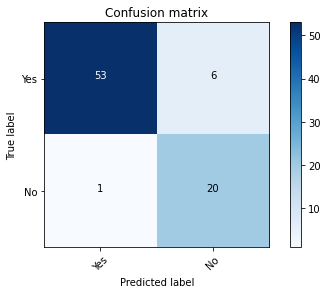

In [18]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],normalize= False,  title='Confusion matrix')

**Visualising the Test set results**

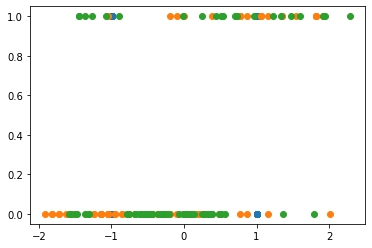

In [19]:
plt.plot(X_test,y_test,"o")